=== Shift 1 Assignments ===
P0: Teams (1, 5)
P1: Teams (1, 6)
P2: Teams (0, 5)
P3: Teams (5, 7)
P4: Teams (5, 6)
P5: Teams (2, 7)
P6: Teams (0, 4)
P7: Teams (0, 7)

=== Shift 2 Assignments ===
P0: Teams (4, 5)
P1: Teams (5, 6)
P2: Teams (4, 6)
P3: Teams (0, 3)
P4: Teams (0, 2)
P5: Teams (1, 5)
P6: Teams (4, 7)
P7: Teams (1, 2)

⚠️ Repeated team-pairs across shifts: 5

=== Roadmap per Team ===
Team 1:
  Shift 1 → ['P0', 'P1']
  Shift 2 → ['P5', 'P7']
Team 5:
  Shift 1 → ['P0', 'P2', 'P3', 'P4']
  Shift 2 → ['P0', 'P1', 'P5']
Team 6:
  Shift 1 → ['P1', 'P4']
  Shift 2 → ['P1', 'P2']
Team 0:
  Shift 1 → ['P2', 'P6', 'P7']
  Shift 2 → ['P3', 'P4']
Team 7:
  Shift 1 → ['P3', 'P5', 'P7']
  Shift 2 → ['P6']
Team 2:
  Shift 1 → ['P5']
  Shift 2 → ['P4', 'P7']
Team 4:
  Shift 1 → ['P6']
  Shift 2 → ['P0', 'P2', 'P6']
Team 3:
  Shift 1 → []
  Shift 2 → ['P3']


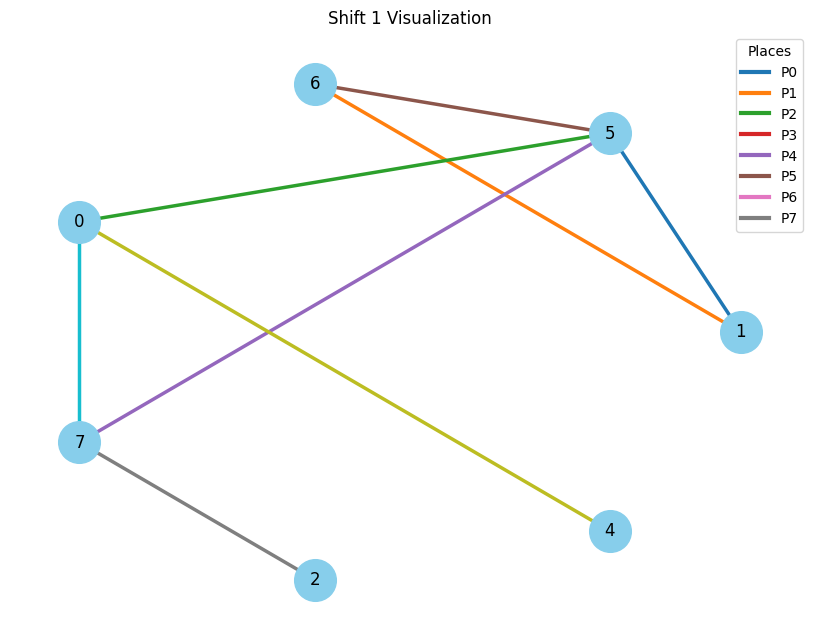

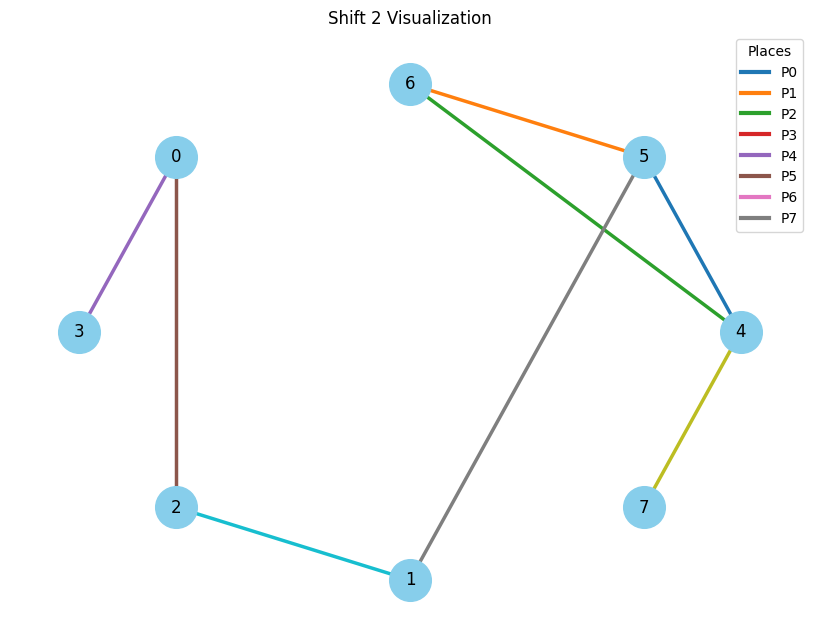

In [2]:
import itertools
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import networkx as nx

teams = list(range(8))
all_pairs = list(itertools.combinations(teams, 2))  # Total 28 unique pairs

# === Step 1: Build a single shift with 16 non-repeating team pairs ===
def build_shift(pairs, max_per_team=4):
    shift = []
    team_counts = defaultdict(int)
    
    for pair in pairs:
        a, b = pair
        if team_counts[a] < max_per_team and team_counts[b] < max_per_team:
            shift.append(pair)
            team_counts[a] += 1
            team_counts[b] += 1
        if len(shift) == 16:
            break
    
    return shift if len(shift) == 16 else None

# === Step 2: Build two shifts with minimum overlap ===
def find_shifts_with_overlap():
    attempts = 0
    while attempts < 10000:
        random.shuffle(all_pairs)
        shift1 = build_shift(all_pairs)
        if not shift1:
            continue

        # Try to find shift2 that has minimal overlap
        best_shift2 = None
        min_overlap = 16
        for _ in range(1000):
            random.shuffle(all_pairs)
            shift2 = build_shift(all_pairs)
            if not shift2:
                continue
            overlap = len(set(shift1) & set(shift2))
            if overlap < min_overlap:
                min_overlap = overlap
                best_shift2 = shift2
            if min_overlap == 0:
                break
        if best_shift2:
            return shift1, best_shift2, min_overlap

        attempts += 1
    raise RuntimeError("Failed to find two valid shifts.")

# === Step 3: Assign team-pairs to places ===
def assign_places(shift):
    return {f'P{i}': shift[i] for i in range(8)}

# === Step 4: Build roadmap per team ===
def build_roadmap(places1, places2):
    roadmap = defaultdict(lambda: {'Shift 1': [], 'Shift 2': []})
    for place, pair in places1.items():
        for team in pair:
            roadmap[team]['Shift 1'].append(place)
    for place, pair in places2.items():
        for team in pair:
            roadmap[team]['Shift 2'].append(place)
    return roadmap

# === Step 5: Visualize each shift as a graph ===
def visualize_shift(places, title="Shift"):
    G = nx.Graph()
    color_map = {}
    for i, (place, pair) in enumerate(places.items()):
        G.add_edge(*pair)
        color_map[pair] = i
    
    edge_colors = []
    for u, v in G.edges():
        pair = tuple(sorted((u, v)))
        color = color_map.get(pair)
        edge_colors.append(color)
    
    pos = nx.circular_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color="skyblue",
            edge_color=edge_colors, edge_cmap=plt.cm.tab10,
            width=2.5, node_size=900)
    
    legend_labels = {i: f"{p}" for i, p in enumerate(places)}
    patches = [plt.Line2D([0], [0], color=plt.cm.tab10(i), lw=3, label=label)
               for i, label in legend_labels.items()]
    plt.legend(handles=patches, title="Places")
    plt.title(title)
    plt.axis("off")
    plt.show()

# === Run the logic ===
shift1, shift2, repeated_pairs = find_shifts_with_overlap()

places_shift1 = assign_places(shift1)
places_shift2 = assign_places(shift2)

roadmap = build_roadmap(places_shift1, places_shift2)

# === Display Results ===
print("=== Shift 1 Assignments ===")
for place, pair in places_shift1.items():
    print(f"{place}: Teams {pair}")

print("\n=== Shift 2 Assignments ===")
for place, pair in places_shift2.items():
    print(f"{place}: Teams {pair}")

print(f"\n⚠️ Repeated team-pairs across shifts: {repeated_pairs}\n")

print("=== Roadmap per Team ===")
for team, shifts in roadmap.items():
    print(f"Team {team}:")
    print(f"  Shift 1 → {shifts['Shift 1']}")
    print(f"  Shift 2 → {shifts['Shift 2']}")

# === Visualize both shifts ===
visualize_shift(places_shift1, title="Shift 1 Visualization")
visualize_shift(places_shift2, title="Shift 2 Visualization")
